In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_credit = pd.read_csv("C:\\Users\\ISTC Teacher PC\\Desktop\\ISLR_Data\\Credit.csv")
data_credit.head(6)
data_credit = data_credit.drop('Unnamed: 0', axis = 1)
data_credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [9]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [10]:
data_credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [11]:
data_credit.Student.describe()

count     400
unique      2
top        No
freq      360
Name: Student, dtype: object

In [13]:
data_credit.Student.value_counts()

No     360
Yes     40
Name: Student, dtype: int64

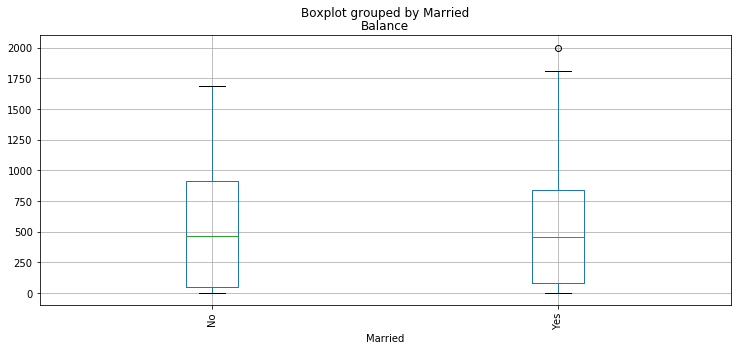

In [22]:
data_credit.boxplot('Balance','Married', figsize = (12,5), rot = 90)

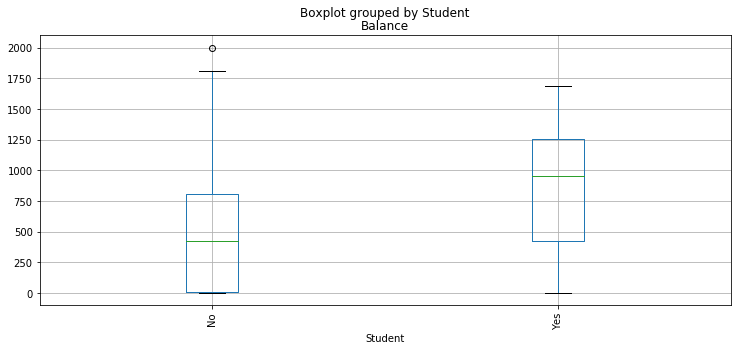

In [17]:
data_credit.boxplot('Balance','Student', figsize = (12,5), rot = 90)

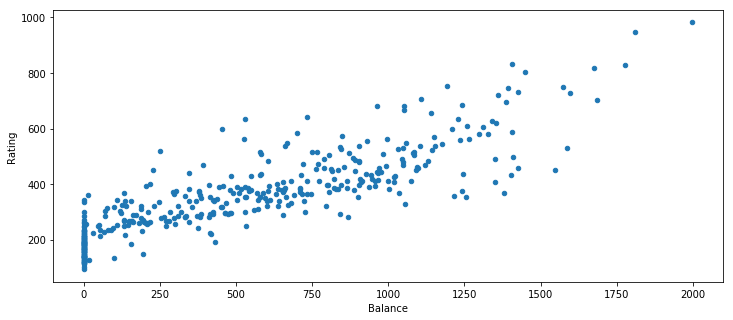

In [19]:
data_credit.plot('Balance','Rating', figsize = (12,5), kind = "scatter")

In [20]:
data_credit.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


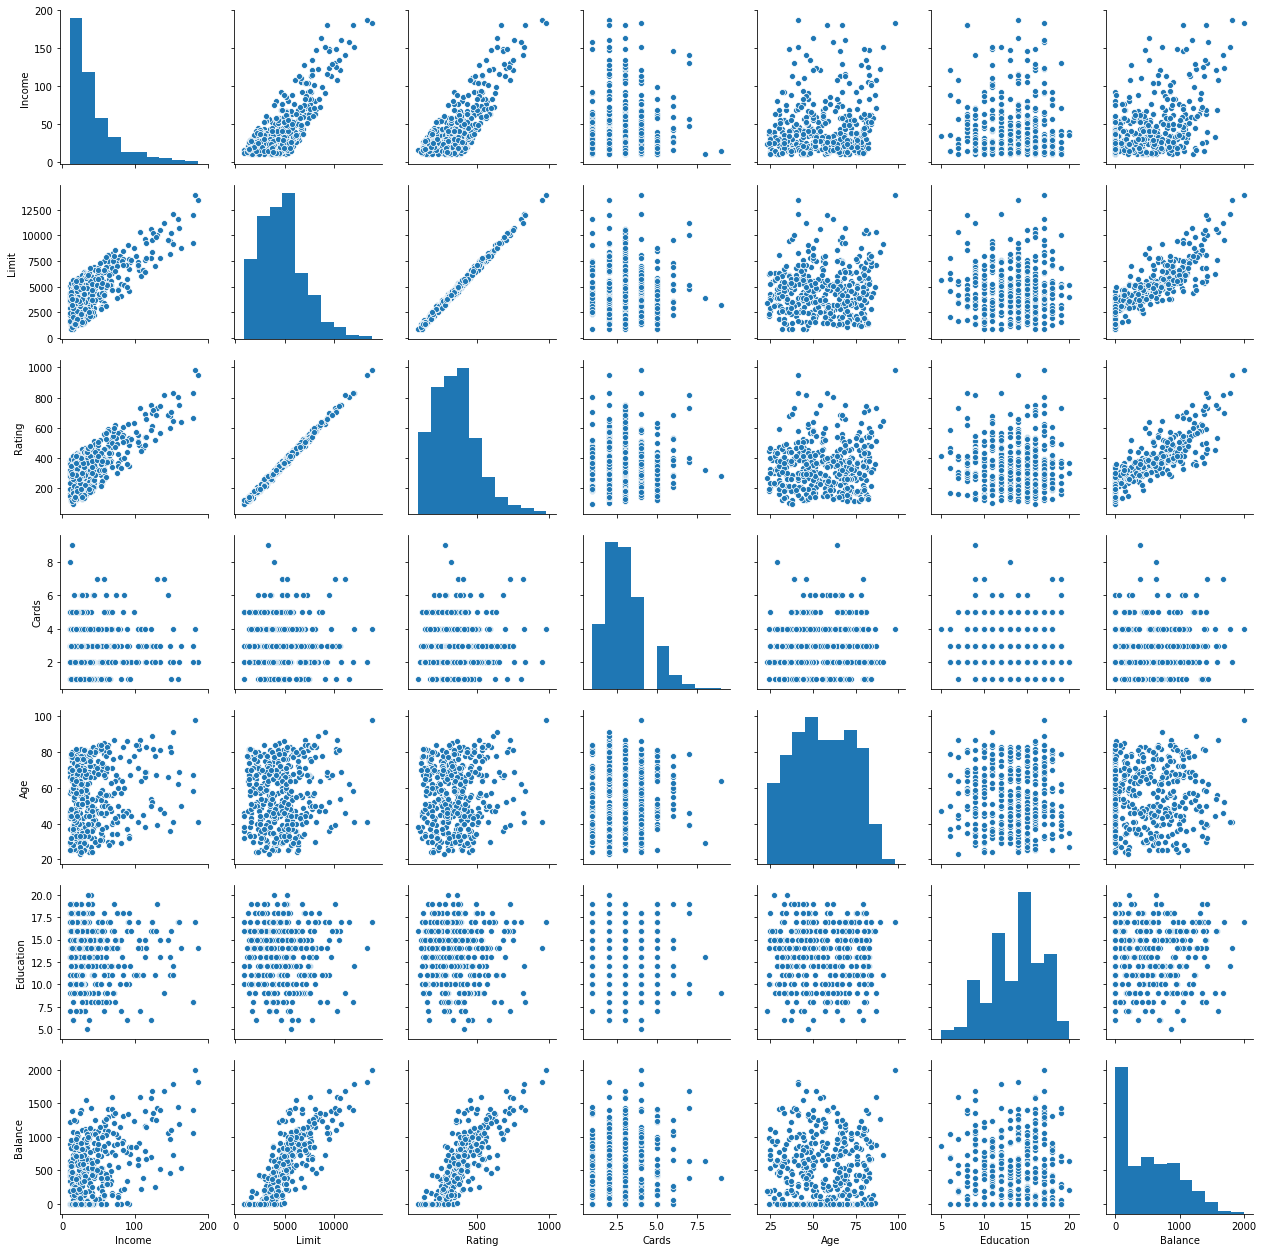

In [21]:
sns.pairplot(data_credit)

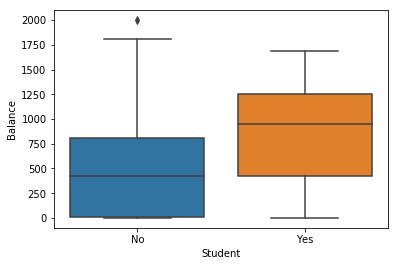

In [25]:
sns.boxplot(x = "Student", y = "Balance", data = data_credit)

In [26]:
import statsmodels.formula.api as smf

In [31]:
data_credit.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [45]:
model = smf.ols("Balance ~ Income + Rating  + Student", data_credit)
model_reg = model.fit()
model_results = model_reg.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2502.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          6.23e-257
Time:                        11:18:15   Log-Likelihood:                -2420.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     396   BIC:                             4865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -581.0789     13.835    -42.002      0.000    -608.277    -553.880
Student[T.Yes]   418.7603     17.230     24.304      0.000     384.886     452.634
Income            -7.8749      0.240    -32.783      0.000      -8.347      -7.403
Rating             3.9875      0.055     72.888      0.000       3.880       4.095
==============================================================================
Omnibus:                       13.580   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.236
Skew:                           0.445   Prob(JB):                     0.000810
Kurtosis:                       2.750   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

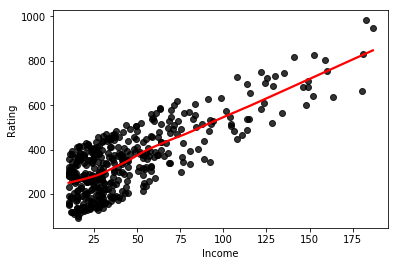

In [50]:
sns.regplot(data_credit.Income,data_credit.Rating, 
            scatter_kws = {'color':'black'}, 
            line_kws = {'color':'r'},
           lowess = True)

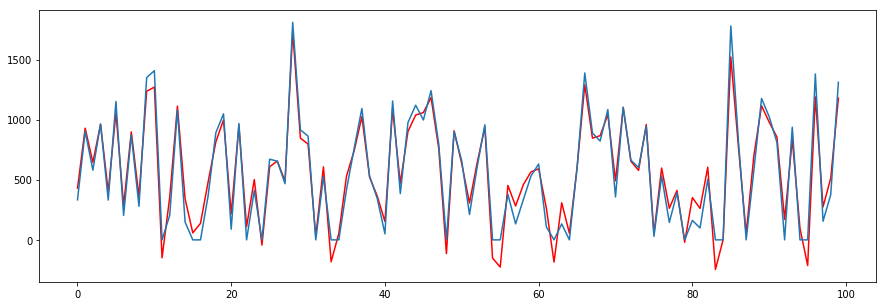

In [56]:
pred = model_reg.predict()

plt.figure(figsize = (15,5))
plt.plot(pred[:100], color = 'red');
plt.plot(data_credit.Balance[:100]);



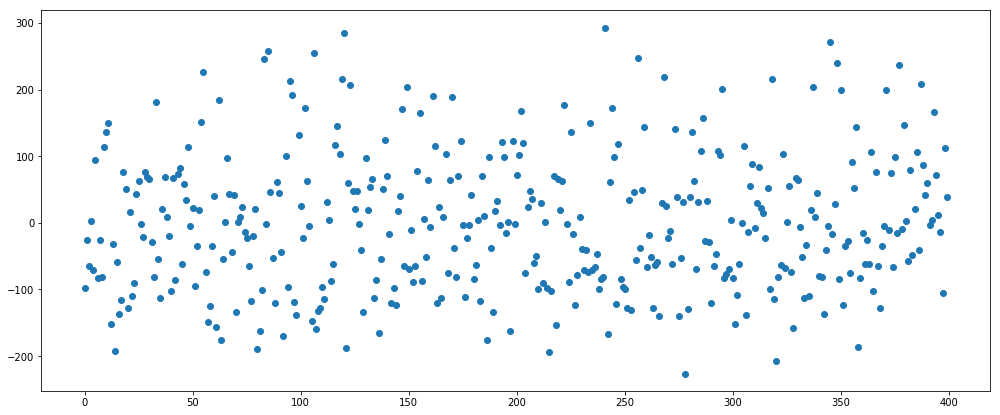

In [60]:
plt.figure(figsize = (17,7))
plt.plot(model_reg.resid,"o");